In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings 
warnings.filterwarnings("ignore")

# Introduction



Set of Questions:
- Can we predict future unemployment rates in regions in USA using linear regression, considering the historical data?
- Is there a significant difference in unemployment rates among top 10 different state using ANOVA?
- Are there any specific factors (e.g., economic indicators) that are strongly associated with high or low unemployment rates using generalized linear models?
- Can we identify regions with similar unemployment rate trends using non- parametric statistics and clustering techniques?
- How effective are regularization techniques (Ridge/LASSO) in improving the predictive accuracy of our unemployment rate model?
- States with the most or least, unemployment. (The factor on which we’ll be selecting states)

# Exploratory Data Analysis

In [2]:
import pandas as pd
Unemployment = pd.read_csv('/kaggle/input/jsa-dataset-unemployment-2018-csv/JSA_Dataset_Unemployment by State 1976 - 2018.csv')
Unemployment.columns

Index(['index', 'Month and Year', 'State', 'Civilian Population',
       'Total Labor Force', 'Percent of Population', 'Employed - Total',
       'Employed - Percent of Population', 'Unemployed - Total',
       'Unemployed - Percent of Labor Force'],
      dtype='object')

## Data Cleaning

In [3]:
# check the null values
print("Any null values in the DataFrame:")
print(Unemployment.isnull().any().any())

# drop the index column.
Unemployment.drop(['index'], axis=1, inplace=True)

# Convert 'Month and Year' to datetime
Unemployment['Month and Year'] = pd.to_datetime(Unemployment['Month and Year'])

# Extract year and month as new features
Unemployment['Year'] = Unemployment['Month and Year'].dt.year

Any null values in the DataFrame:
False


- The data cleaning process involved checking for missing values, dropping the unnecessary 'index' column, converting the 'Month and Year' column to a datetime format, and extracting the year to create a new 'Year' variables. These steps were taken to ensure data integrity and prepare the dataset for subsequent tasks such as modeling or visualization.

## Descriptive Summary

In [4]:
# Display the statistic of the dataset.
print('Dataset Statistics:')
print(Unemployment.describe())

Dataset Statistics:
                      Month and Year  Civilian Population  Total Labor Force  \
count                          26316         2.631600e+04       2.631600e+04   
mean   1997-06-16 08:11:09.767441792         4.051173e+06       2.635714e+06   
min              1976-01-01 00:00:00         2.320000e+05       1.589610e+05   
25%              1986-09-23 12:00:00         1.049000e+06       6.897202e+05   
50%              1997-06-16 00:00:00         2.719866e+06       1.764892e+06   
75%              2008-03-08 18:00:00         4.781626e+06       3.165811e+06   
max              2018-12-01 00:00:00         3.135768e+07       1.959304e+07   
std                              NaN         4.541753e+06       2.923081e+06   

       Percent of Population  Employed - Total  \
count           26316.000000      2.631600e+04   
mean               65.944646      2.471534e+06   
min                50.300000      1.476660e+05   
25%                63.200000      6.523390e+05   
50%      

- The datasetstatistics show that the dataset spans from January 1976 to December 2018 and includes information on labor-related metrics across different states in the USA. 

- The average civilian population is approximately 4.05 million, with a total labor force averaging around 2.64 million. The employed population is about 65.94% and the unemployment rate averages around 5.97%.

- The dataset reveals variability, with the civilian population ranging from 232,000 to 31.36 million and the total labor force ranging from 158,961 to 19.59 million. Most values fall within the interquartile range, indicating a central tendency in the data. 


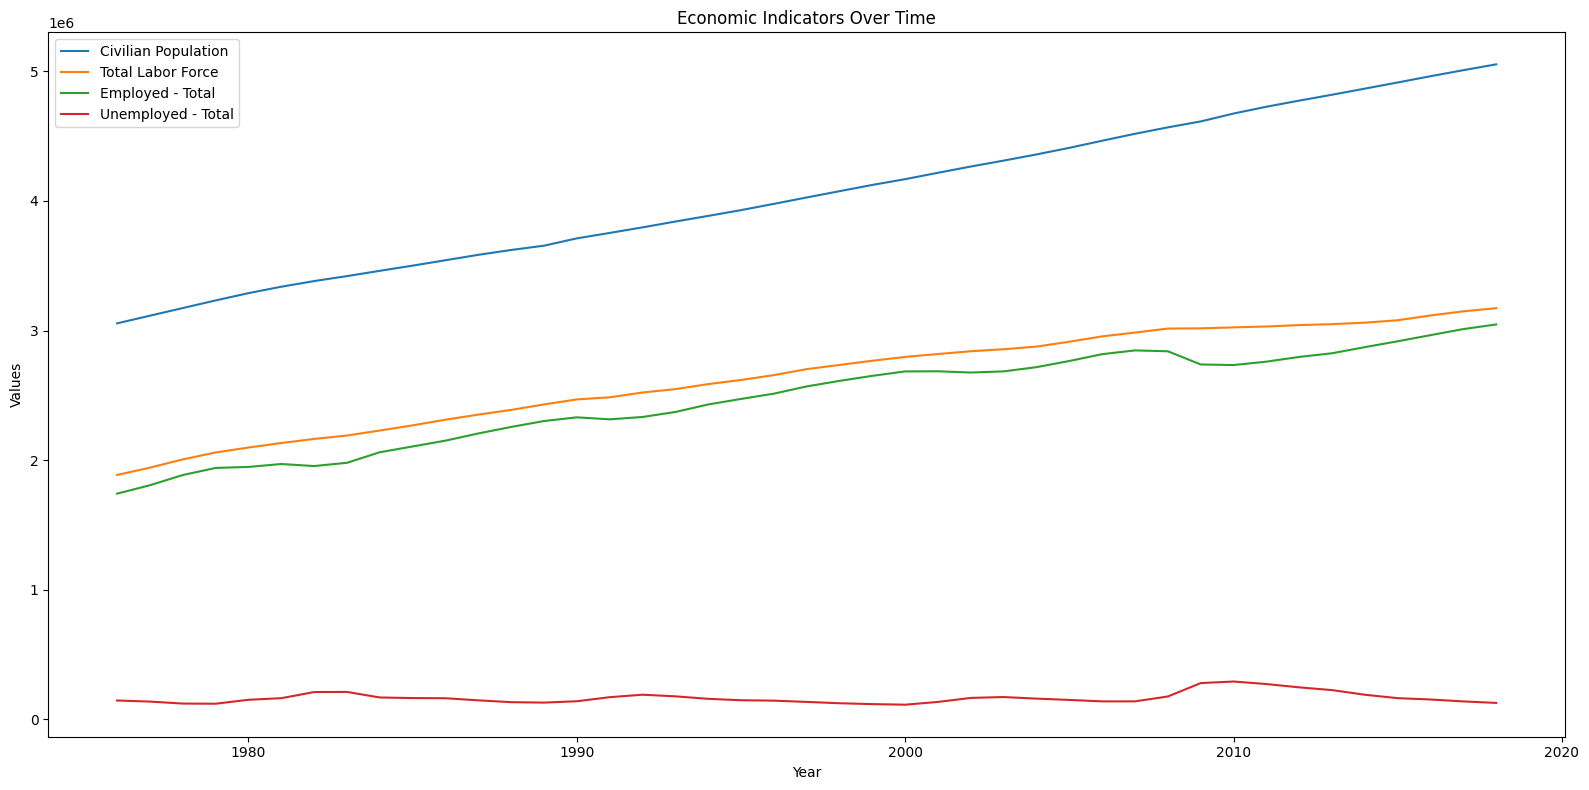

In [5]:
# Distributions  of over the year.
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
plt.figure(figsize=(16, 8))

# Select relevant columns
selected_columns = ['Civilian Population', 'Total Labor Force', 'Employed - Total', 'Unemployed - Total']

# Calculate the average values across all states for each year
average_values = Unemployment.groupby('Year')[selected_columns].mean().reset_index()

# Line plot for the overall Economic Indicators Over Time
sns.lineplot(x='Year', y='Civilian Population', data=average_values, label='Civilian Population')
sns.lineplot(x='Year', y='Total Labor Force', data=average_values, label='Total Labor Force')
sns.lineplot(x='Year', y='Employed - Total', data=average_values, label='Employed - Total')
sns.lineplot(x='Year', y='Unemployed - Total', data=average_values, label='Unemployed - Total')

plt.title('Economic Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Values')

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


- The line plot indicates a steady upward trend in the civilian population, total labor force, and total employed people over the years. The total unemployed metric exhibits relatively smooth, maintaining a generally low position on the plot. But there is a distinct increase in total unemployed individuals around the year 2008, due to the impact of the American subprime mortgage crisis. 

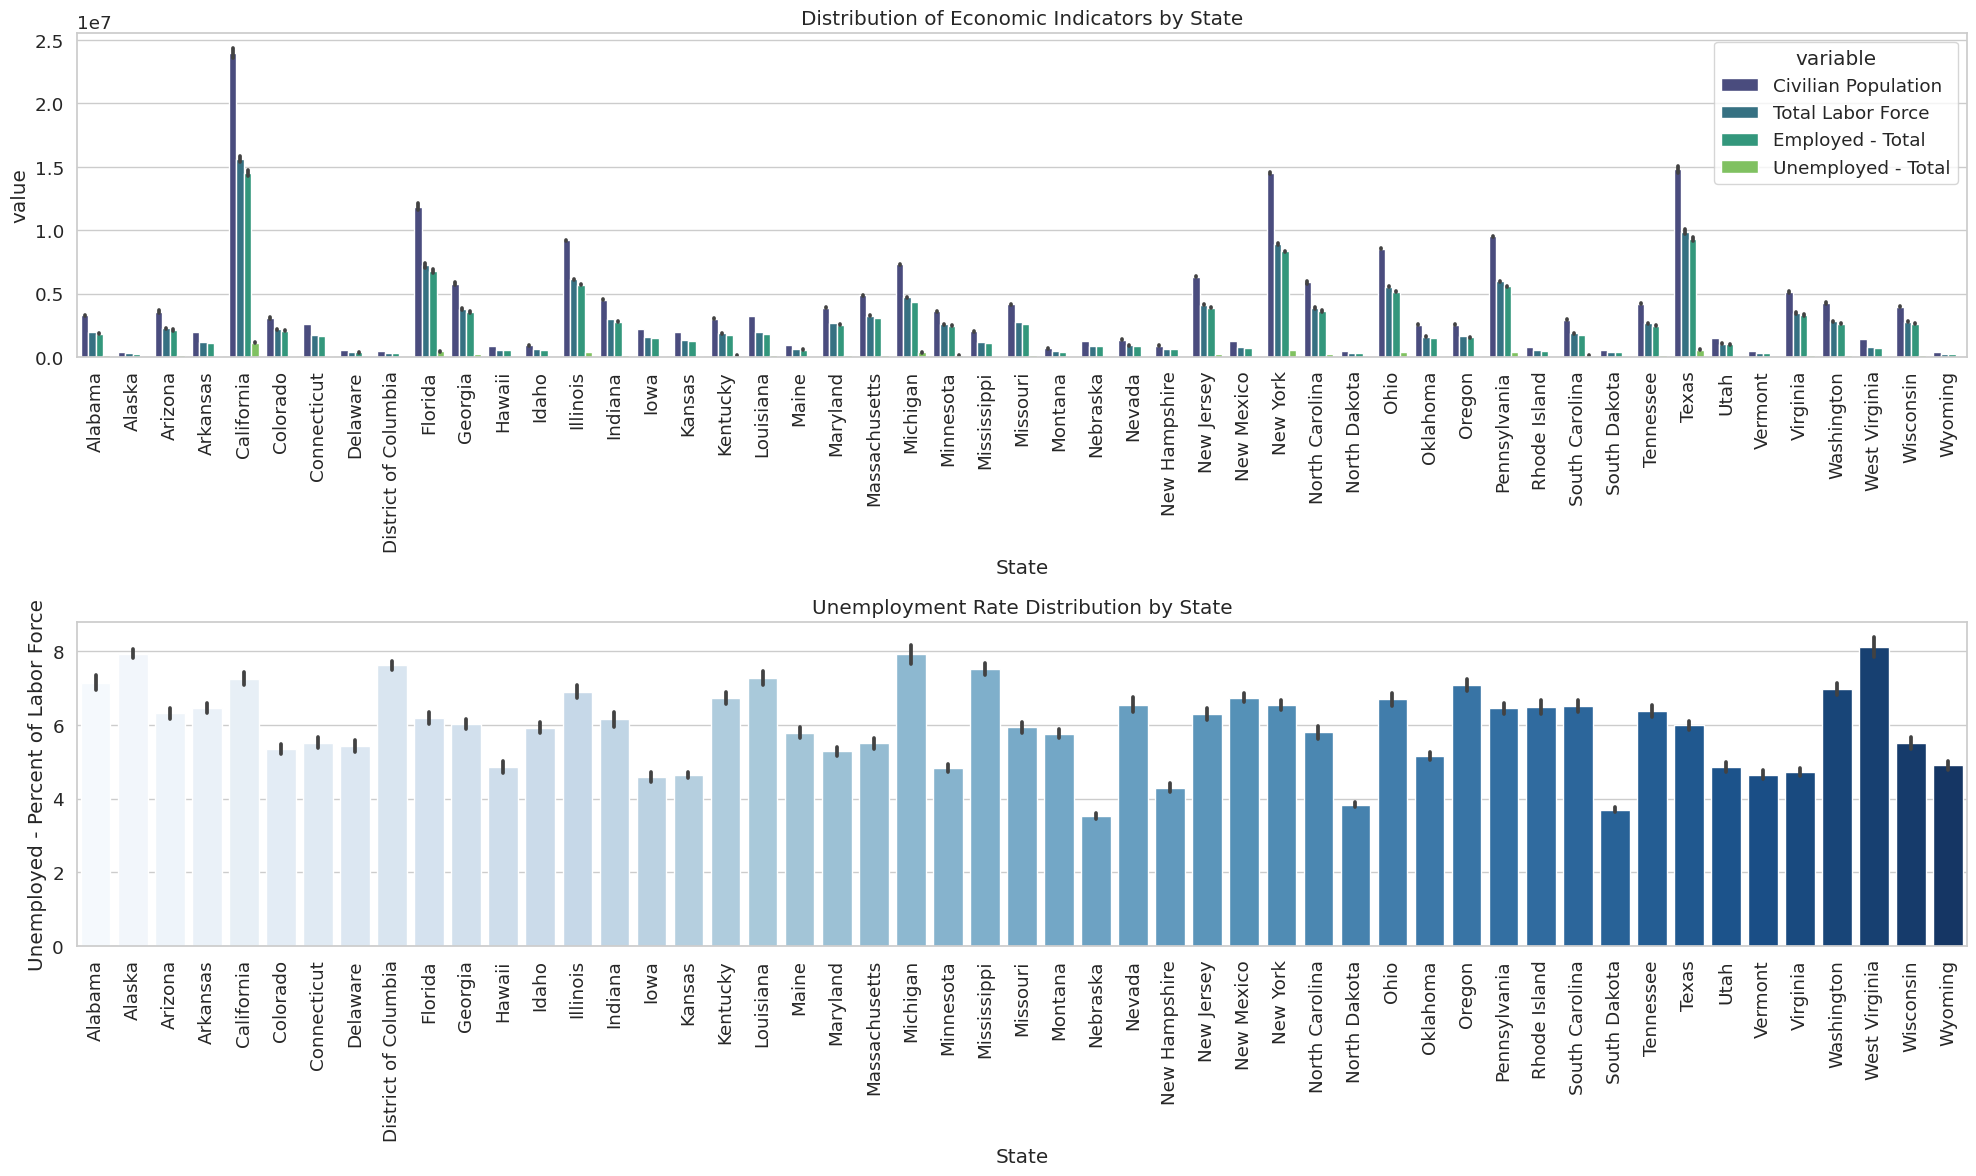

In [6]:
# distribution by state.

import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger plot style
sns.set(style="whitegrid", font_scale=1.2)

# Create a larger figure
plt.figure(figsize=(20, 12))

# Select relevant columns
selected_columns = ['Civilian Population', 'Total Labor Force', 
                     'Employed - Total','Unemployed - Total']

# Melt the DataFrame for better visualization
melted_df = pd.melt(Unemployment, id_vars='State', value_vars=selected_columns)

# Plot the data
plt.subplot(2, 1, 1)
sns.barplot(x='State', y='value', hue='variable', data=melted_df, palette='viridis')
plt.title('Distribution of Economic Indicators by State')
plt.xticks(rotation=90)

# Unemployment rate distribution
plt.subplot(2, 1, 2)
sns.barplot(x='State', y='Unemployed - Percent of Labor Force', data=Unemployment, palette='Blues')
plt.title('Unemployment Rate Distribution by State')
plt.xticks(rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


- The box plots provide insights into the distribution of key metrics across different states, including civilian population, total labor force, total employed individuals, and Unemployed - Total. Notably, California stands out as a prominent state with the highest values across all metrics. Other states such as Florida, New York, Texas, Pennsylvania, Ohio, New Jersey, and Illinois also exhibit robust economic indicators, suggesting their attractiveness in terms of employment opportunities and population influx.

- In contrast, the box plot for Unemployed - Total reveals variations in unemployment rates. The states have nuances in unemployment rates, but the overall variation does not appear to be exceptionally large. This observation implies that, despite economic differences, states tend to exhibit relatively similar unemployment rate distributions. This may indicate consistent labor market conditions across regions or common economic trends.

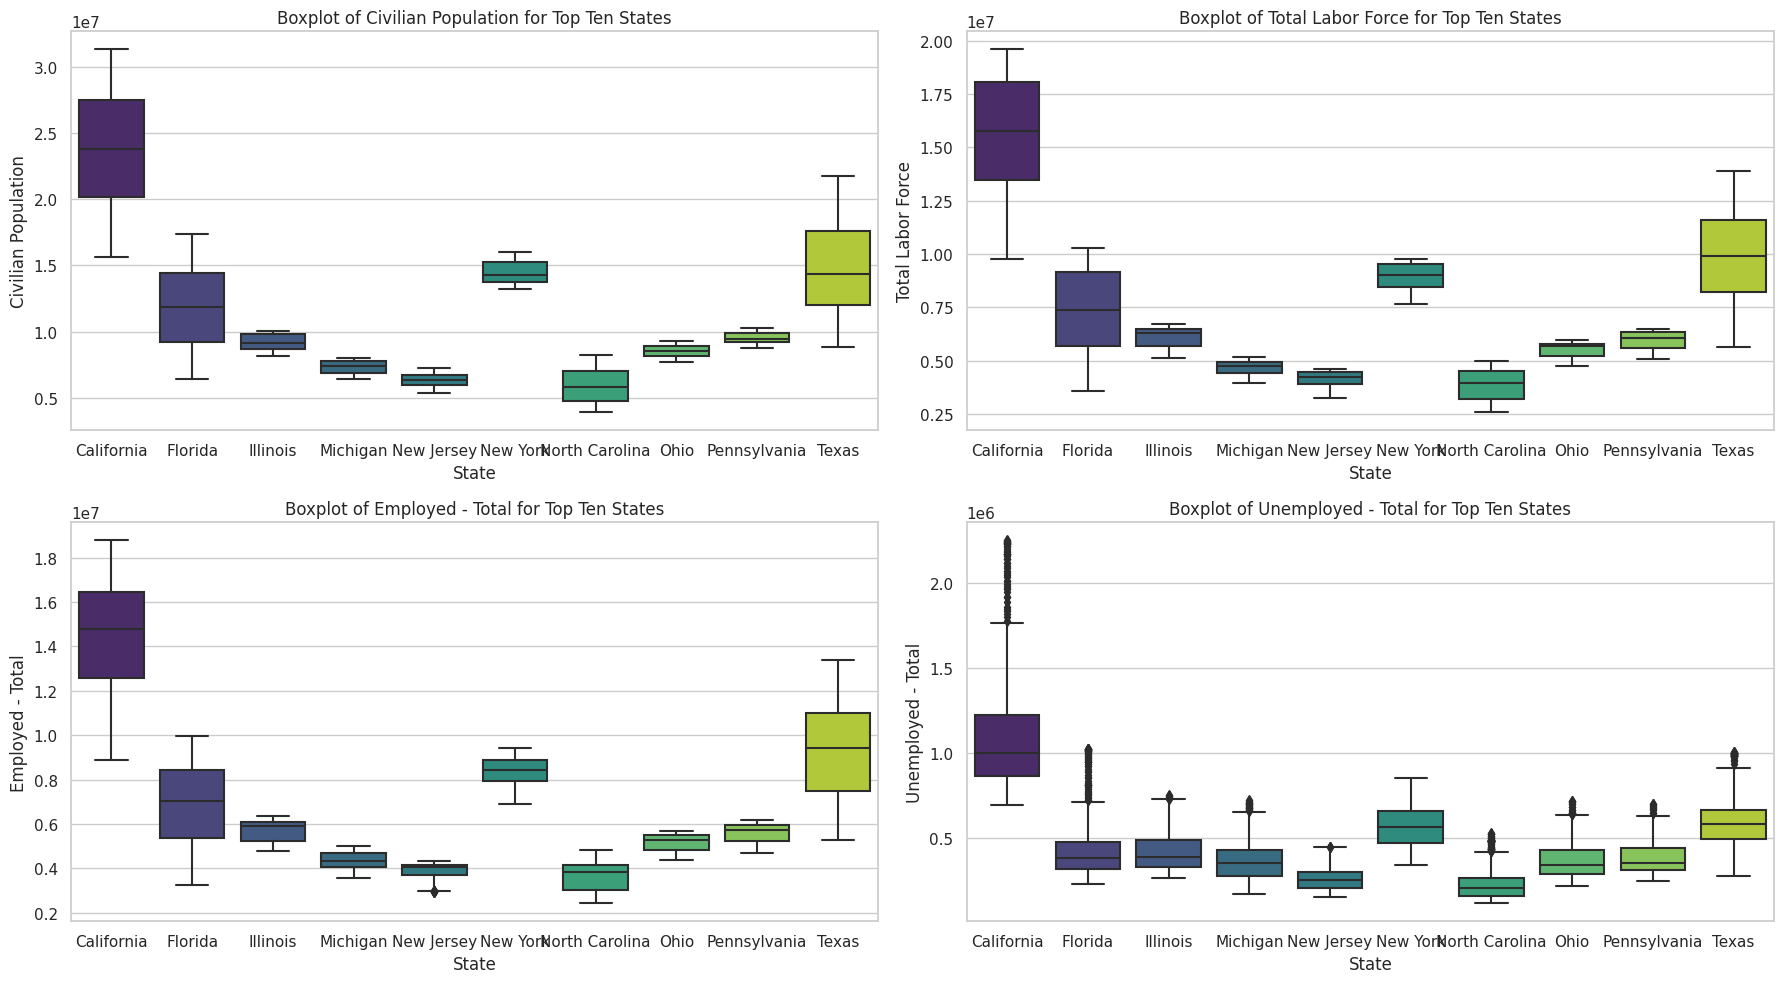

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(18, 10))

# Select relevant columns
selected_columns = ['Civilian Population', 'Total Labor Force', 'Employed - Total', 'Unemployed - Total']

# Get the top ten states based on mean 'Civilian Population'
top_ten_states = Unemployment.groupby('State')[selected_columns].mean().sort_values('Civilian Population', ascending=False).head(10).index

# Filter the DataFrame for the top ten states
top_ten_data = Unemployment[Unemployment['State'].isin(top_ten_states)]

# Create boxplots for each economic indicator
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='State', y=column, data=top_ten_data, palette='viridis')
    plt.title(f'Boxplot of {column} for Top Ten States')
    plt.xlabel('State')
    plt.ylabel(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


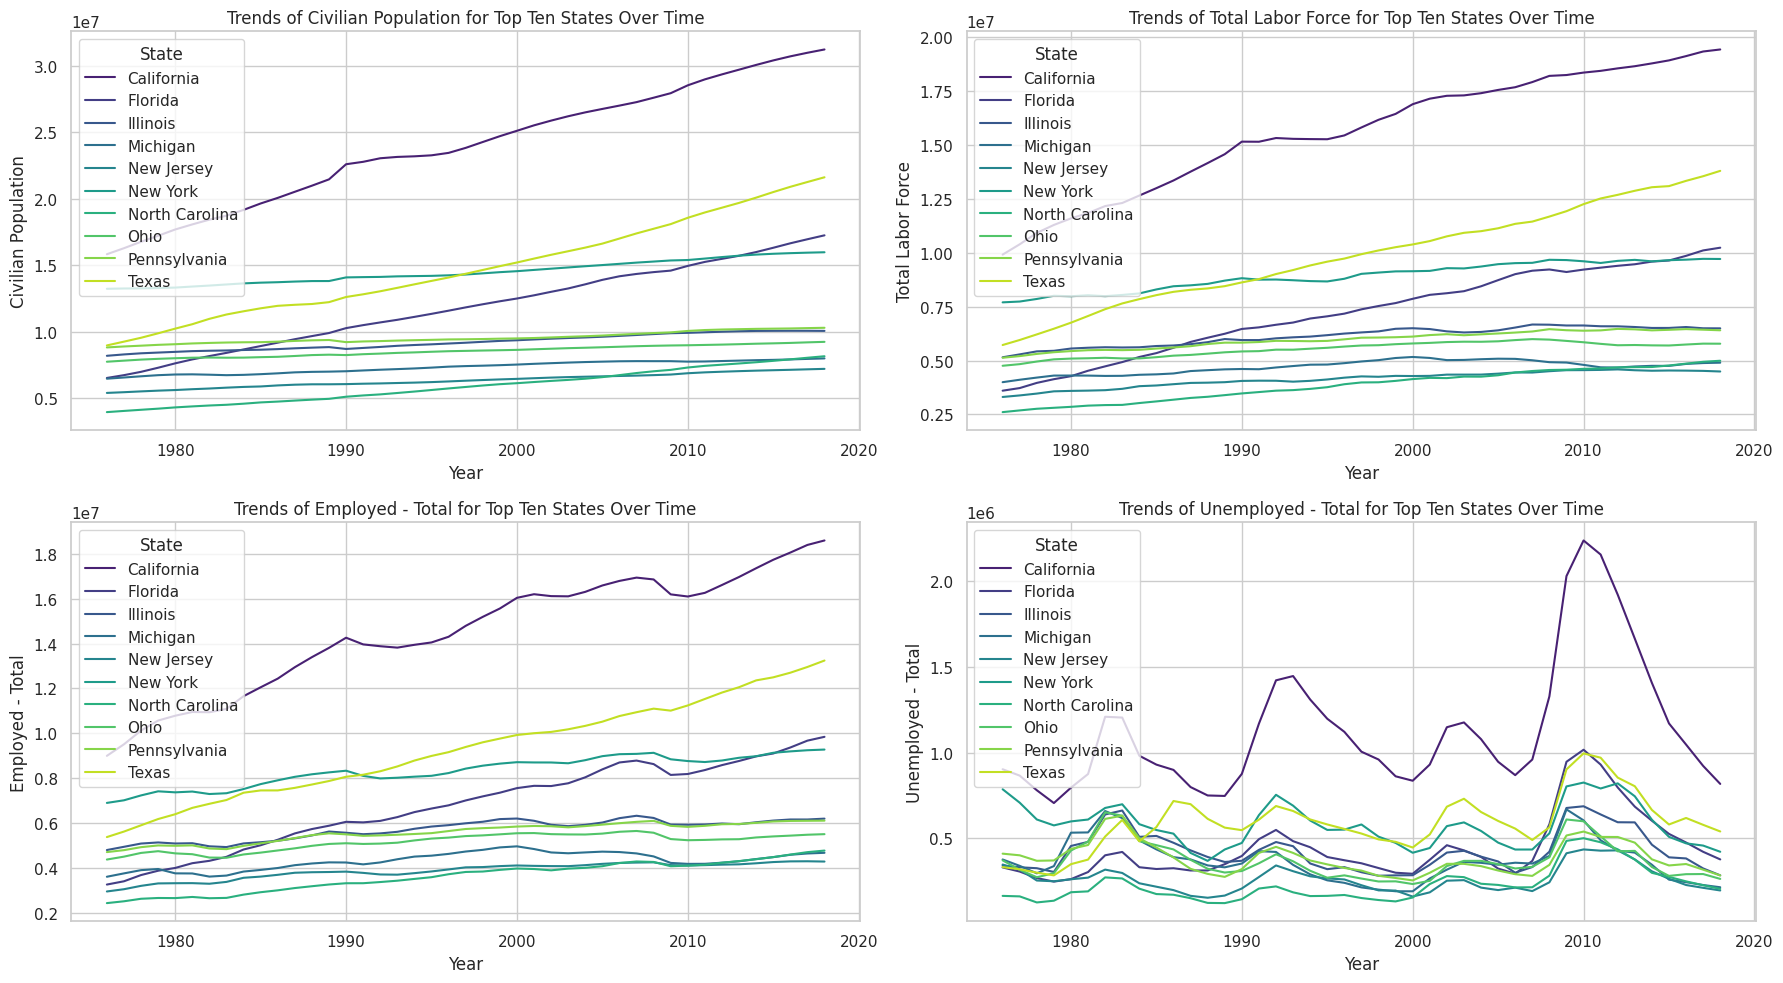

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(18, 10))

# Select relevant columns
selected_columns = ['Civilian Population', 'Total Labor Force', 'Employed - Total', 'Unemployed - Total']

# Get the top ten states based on mean 'Civilian Population'
top_ten_states = Unemployment.groupby('State')[selected_columns].mean().sort_values('Civilian Population', ascending=False).head(10).index

# Filter the DataFrame for the top ten states
top_ten_data = Unemployment[Unemployment['State'].isin(top_ten_states)]

# Line plot for the overall Economic Indicators Over Time for Top Ten States
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(x='Year', y=column, hue='State', data=top_ten_data, palette='viridis', ci=None)
    plt.title(f'Trends of {column} for Top Ten States Over Time')
    plt.xlabel('Year')
    plt.ylabel(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


- The boxplots highlight the characteristics of the top ten states in terms of civilian population, total labor force, total employed individuals, and Unemployed. California significantly stands out, with its box plot notably larger than other states. This suggests that California has a more rapid increase in economy. And the line plot further supports this observation with a relatively steep trend line.

- But the line plot also shows a consistent overall trend. This suggests that, despite differing economic landscapes, the majority of states share a similar pattern of growth or decline over the years.

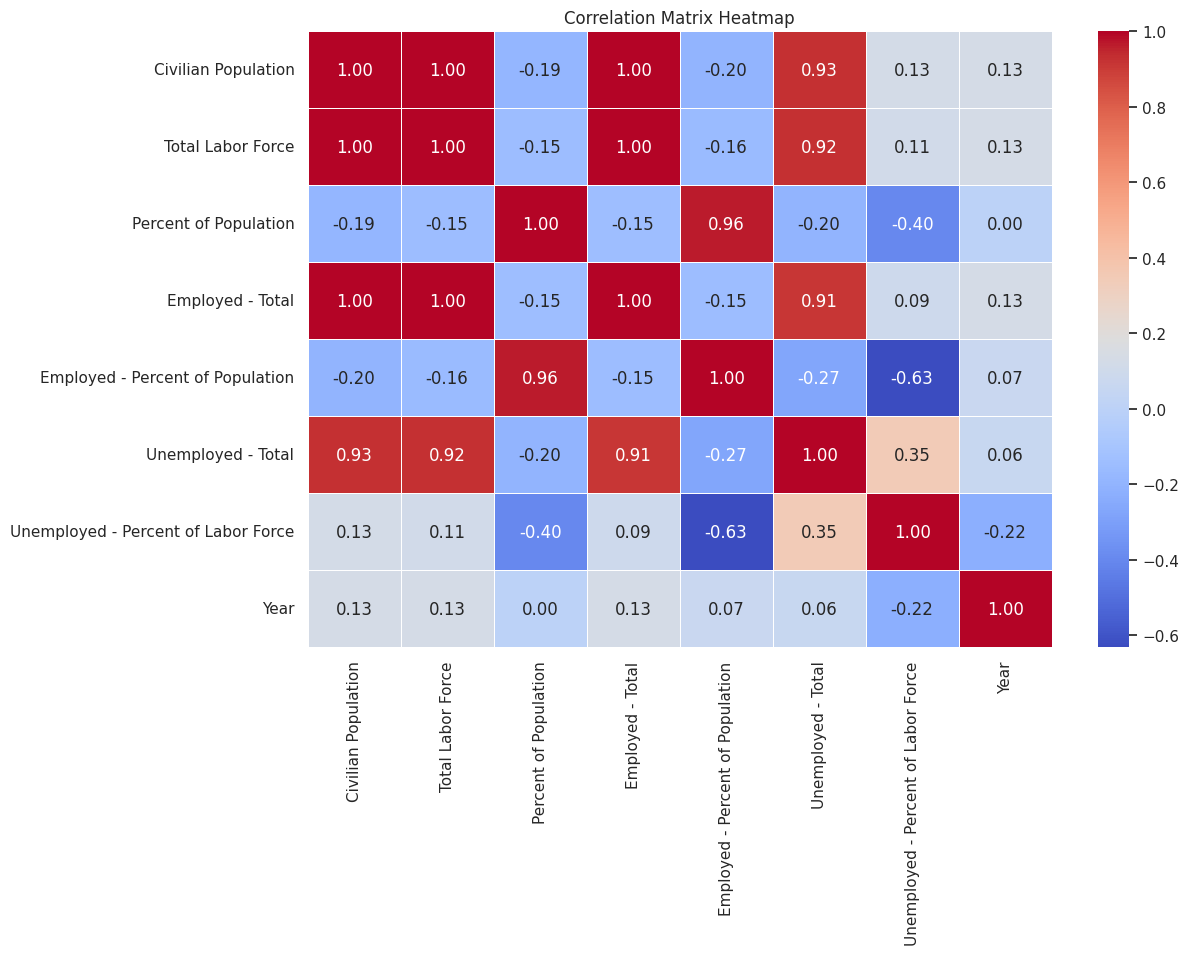

In [9]:
correlation_matrix = Unemployment.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- The heatmap reveals correlations between the unemployment rate and various economic indicators. There is a negative correlation between the unemployment rate and the labor force ratio, as well as the employment rate. This implies that as the labor force ratio and employment rate increase, the unemployment rate tends to decrease.

- In contrast, positive correlations are observed between the unemployment rate and the total labor force、total unemployment people, and the civilian population. This indicates that higher levels of unemployment are associated with these variables. 

# Create Model

## Linear Regression

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

X = Unemployment.drop(columns=['Month and Year', 'State', 'Year','Unemployed - Percent of Labor Force'])
y = Unemployment['Unemployed - Percent of Labor Force']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Linear Regression model
model1 = LinearRegression()
results = model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model1.predict(X_test)


## Model Performance

In [11]:
# Evaluate the model's performance
r2_score = model1.score(X_test, y_test)
print(f'R-squared Score on Test Data: {r2_score}')
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

R-squared Score on Test Data: 0.9944802326045811
Coefficients: [-1.89576812e-08  1.41436376e-07  1.41457940e+00 -1.46145757e-07
 -1.50945695e+00  2.87591750e-07]
Intercept: 6.354441084390844
Mean Squared Error on Test Data: 0.024702684061650527


## Logistic Regression

In [12]:
# Add a 'Trend' column to represent the unemployment rate trend, 0 for decreasing, 1 for increasing
Unemployment['Trend'] = (Unemployment['Unemployed - Percent of Labor Force'] > Unemployment['Unemployed - Percent of Labor Force'].shift()).astype(int)

# Convert 'Trend' to categorical
Unemployment['Trend'] = Unemployment['Trend'].astype('category')

X = Unemployment.drop(columns=['Month and Year', 'State', 'Year','Unemployed - Percent of Labor Force','Trend'])
y = Unemployment['Trend']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit a logistic regression model
model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## Model Performance

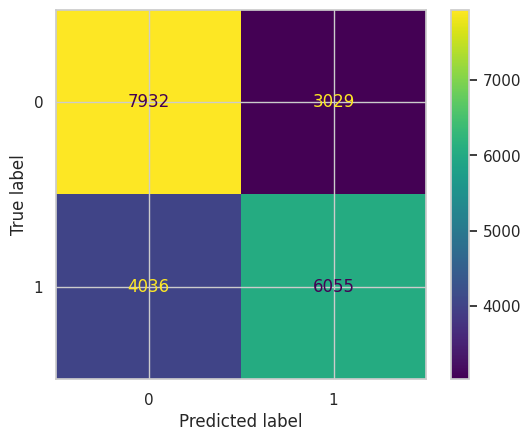

Confusion Matrix (Train Set):
 [[7932 3029]
 [4036 6055]]
Accuracy: 0.66
Precision: 0.67
Recall: 0.60


In [13]:
# Confusion matrix and metrics for the train set
y_train_pred = model1.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train)
disp.plot()
plt.show()

print("Confusion Matrix (Train Set):\n", conf_matrix_train)
print("Accuracy: {:.2f}".format(accuracy_train))
print("Precision: {:.2f}".format(precision_train))
print("Recall: {:.2f}".format(recall_train))

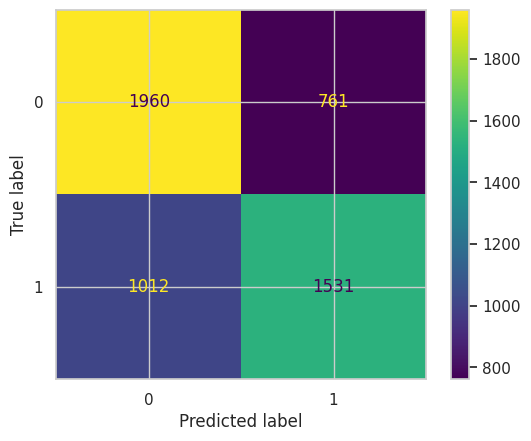

Confusion Matrix (Test Set):
 [[1960  761]
 [1012 1531]]
Accuracy: 0.66
Precision: 0.67
Recall: 0.60


In [14]:
y_test_pred = model1.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp.plot()
plt.show()

print("Confusion Matrix (Test Set):\n", conf_matrix_test)
print("Accuracy: {:.2f}".format(accuracy_test))
print("Precision: {:.2f}".format(precision_test))
print("Recall: {:.2f}".format(recall_test))

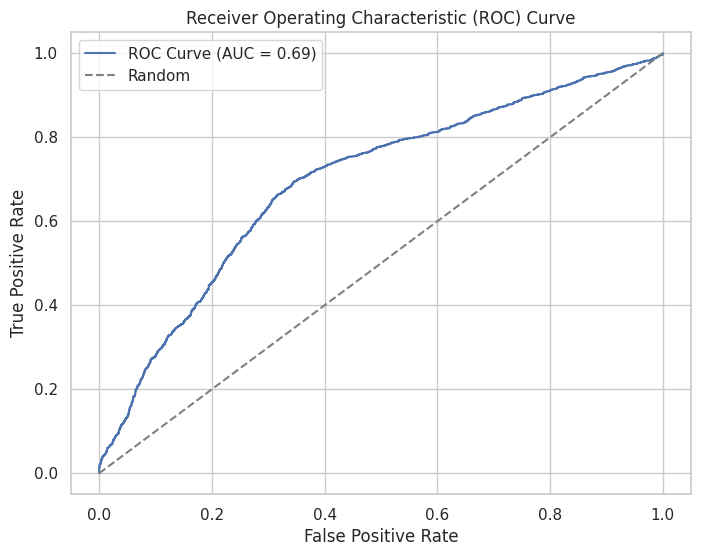

AUC: 0.69


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, model1.predict_proba(X_test)[:,1])

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("AUC: {:.2f}".format(roc_auc))

#### Problem 1: 
Can we predict future unemployment rates in regions in USA using linear regression, considering the historical data?

In [16]:
# Linear Regression to predict the employment rates in states on the basis of historical data 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Converting "Month and Year" to datetime and extract year and month
Unemployment['Month and Year'] = pd.to_datetime(Unemployment['Month and Year'])
Unemployment['Year'] = Unemployment['Month and Year'].dt.year
Unemployment['Month'] = Unemployment['Month and Year'].dt.month


X = Unemployment[['State', 'Civilian Population', 'Year', 'Month']]
y = Unemployment['Employed - Percent of Population']

# Encoding categorical data
categorical_features = ['State']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ], remainder='passthrough')

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Training the model
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.03928153671650403
Mean Absolute Error (MAE): 3.6210981827173874
Mean Squared Error (MSE): 20.35399291537329
Root Mean Squared Error (RMSE): 4.511539971603187


In [17]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Creating dummy variables for 'State' and concatenate them with the specified columns directly
state_dummies = pd.get_dummies(Unemployment['State'], prefix='State')
state_dummies = state_dummies.astype(int)
X = pd.concat([Unemployment[['Civilian Population', 'Year', 'Month']], state_dummies], axis=1)
y = Unemployment['Employed - Percent of Population']

# data is splitted for the linear regression model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Fitting the model
glm = sm.GLM(y_train, X_train_with_const, family=sm.families.Gaussian()).fit()

# Making predictions
y_pred = glm.predict(X_test_with_const)

# Now calculating the metrics
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculating R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 2.123053443236406
Mean Squared Error (MSE): 6.54721138484774
Root Mean Squared Error (RMSE): 2.558751919363763
R-squared: 0.6909684067103954


Linear Regression and Generalized Linear model is not very accurate to predict the unemployment rate for the US states, only with Total population and Labor force.

In [18]:
# predicting unemployment rates with gradient Booster 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Converting "Month and Year" to datetime and extract year and month
Unemployment['Month and Year'] = pd.to_datetime(Unemployment['Month and Year'])
Unemployment['Year'] = Unemployment['Month and Year'].dt.year
Unemployment['Month'] = Unemployment['Month and Year'].dt.month

# Preparing features and target variable
X = Unemployment[['State', 'Civilian Population', 'Year', 'Month']]
y = Unemployment['Employed - Percent of Population']

# Encoding categorical data
categorical_features = ['State']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ], remainder='passthrough')

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Creating a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))])

# Initializing and training the Gradient Boosting Regressor
# model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")



R-squared: 0.8360996774789159
Mean Absolute Error (MAE): 1.5354203314307109
Mean Squared Error (MSE): 3.4724283241313367
Root Mean Squared Error (RMSE): 1.8634452833746786


### ANOVA Test

#### Question 2: 
Is there a significant difference in unemployment rates among top 10 different state using ANOVA?

#### step 1: Formulating Hypothesis 
Null Hypothesis (H0) - There is no significant difference in unemployment rates among the top 10 states.<br>
Alternative Hypothesis (H1) - There is a significant difference in unemployment rates among the top 10 states.<br>

In [19]:
Unemployment.shape

(26316, 12)

#### Step 2: Finding the critical value

two factors are used in this ANOVA tests, so 
at alpha = 0.05
number of population, k=2 and sum of sample size, N=(2*26316)= 52632
df in numerator = dfN = k-1 = 2-1 = 1
df in denominator = dfD = N-k = 52632-2 = 52631

In [20]:
# Calculating the mean unemployment rate for each state and select the top 10 states
top_states = Unemployment.groupby('State')['Unemployed - Percent of Labor Force'].mean().nlargest(10).index

# finding critical value
total_observations = top_states.shape[0]
num_groups = 2
dfn = num_groups - 1  # Degrees of freedom for the numerator
dfd = total_observations - num_groups  # Degrees of freedom for the denominator

# Calculating critical value at alpha = 0.05
alpha = 0.05
critical_value = stats.f.ppf(1 - alpha, dfn, dfd)

print(f"Critical value at alpha {alpha}: {critical_value}")

Critical value at alpha 0.05: 5.317655071578714


#### step 3: computing the test value

In [21]:
from scipy import stats

# Filtering the original df to only include rows from the top 10 states
filtered_df = Unemployment[Unemployment['State'].isin(top_states)]

# Performing one way ANOVA to test if there are significant differences among the top 10 states
anova_results = stats.f_oneway(*(filtered_df[filtered_df['State'] == state]['Unemployed - Percent of Labor Force'] for state in top_states))

print(f"ANOVA F-statistic: {anova_results.statistic:.2f}, p-value: {anova_results.pvalue:.4f}")

# Interpretation based on the p-value
if anova_results.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference in unemployment rates among the top 10 states.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in unemployment rates among the top 10 states.")


ANOVA F-statistic: 17.42, p-value: 0.0000
Reject the null hypothesis. There is a significant difference in unemployment rates among the top 10 states.


#### Question 3: 
Are there any specific factors (e.g., economic indicators) that are strongly associated with high or low unemployment rates using generalized linear models?

In [22]:
# checking through GLM how civiilan population and total labor force of a state affects the unemployment rate
y = Unemployment['Unemployed - Percent of Labor Force']

# Selecting a subset of predictors
X = Unemployment[['Civilian Population', 'Total Labor Force']]

# adding a constant for the intercept
X = sm.add_constant(X)


In [23]:
model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

print(model.summary())


                          Generalized Linear Model Regression Results                          
Dep. Variable:     Unemployed - Percent of Labor Force   No. Observations:                26316
Model:                                             GLM   Df Residuals:                    26313
Model Family:                                 Gaussian   Df Model:                            2
Link Function:                                Identity   Scale:                          4.0831
Method:                                           IRLS   Log-Likelihood:                -55851.
Date:                                 Thu, 02 Jan 2025   Deviance:                   1.0744e+05
Time:                                         20:43:53   Pearson chi2:                 1.07e+05
No. Iterations:                                      3   Pseudo R-squ. (CS):            0.07216
Covariance Type:                             nonrobust                                         
                          coef    std er

- **const**: The intercept of the model. The expected value of the dependent variable when all predictors are 0. Here, it's 5.8254, with a very high level of statistical significance (p < 0.0001).
- **Civilian Population**: The coefficient is 1.86e-06, indicating that for each unit increase in civilian population, the percentage of the labor force that is unemployed increases by this factor, holding all else constant. This relationship is statistically significant (p < 0.0001).
- **Total Labor Force**: The coefficient is -2.805e-06, indicating that for each unit increase in the total labor force, the percentage of the labor force that is unemployed decreases by this factor, holding all else constant. This relationship is also statistically significant (p < 0.0001).</br>
</br>
- The positive coefficient for Civilian Population suggests a positive relationship with the unemployment rate percentage: as the civilian population increases, so does the unemployment rate, all else being equal.
- The negative coefficient for Total Labor Force suggests a negative relationship with the unemployment rate percentage: as the total labor force increases, the unemployment rate decreases, all else being equal.
- The statistical significance of both predictors indicates strong evidence that these relationships are not due to chance.</br>
</br>
- The model explains a certain portion of the variance in the unemployment rate (as indicated by the Pearson chi2 and deviance), but not all of it. Other factors not included in the model may also influence the unemployment rate.</br>
- The pseudo R-squared value (0.07216) indicates that the model explains about 7.2% of the variability in the unemployment rate around its mean. This suggests that while the predictors are statistically significant, they alone do not capture all the complexity of the unemployment rate's variations.</br>



In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

### Can we identify regions with similar unemployment rate trends using non-parametric statistics and clustering techniques?

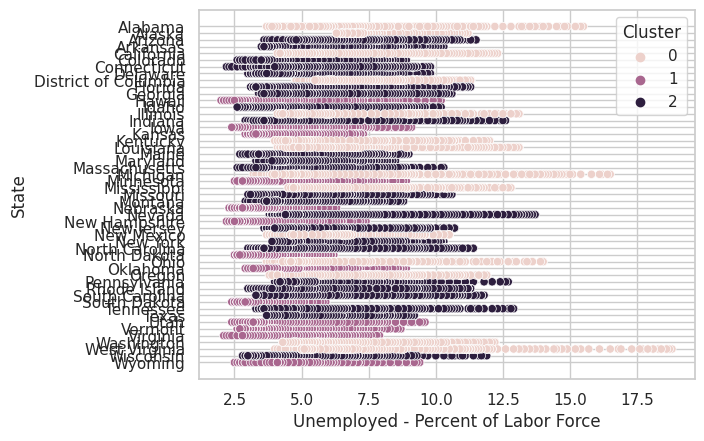

In [25]:
# Select relevant columns
columns_of_interest = ['State', 'Unemployed - Percent of Labor Force']
selected_data = Unemployment[columns_of_interest]

# Group by State and calculate the mean
grouped_data = selected_data.groupby('State').mean()

# Pivot the data for clustering
pivot_data = grouped_data.pivot_table(index='State', values='Unemployed - Percent of Labor Force')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
Unemployment['Cluster'] = Unemployment['State'].map(dict(zip(pivot_data.index, clusters)))

# Visualize the clusters
sns.scatterplot(x='Unemployed - Percent of Labor Force', y='State', hue='Cluster', data=Unemployment)
plt.show()

The clustering analysis performed on the unemployment data initially resulted in a cluttered plot when visualizing the relationships between states and their respective unemployment rates. This clutter arises due to the sheer number of individual states, making it challenging to discern meaningful patterns or trends at a glance. To address this issue, the decision was made to divide the states into regions. Grouping states into regions provides a more consolidated view, allowing for easier interpretation of the overall distribution of unemployment rates within each region. This approach enhances the clarity of the plot by highlighting broader trends and patterns among states that share similar economic characteristics. By organizing the data into regions, the visual representation becomes more manageable and insightful, facilitating a more effective communication of the clustering results and enabling stakeholders to quickly identify regional trends in unemployment rates.

In [26]:
# Define dictionaries mapping states to regions
west_states = ['California', 'Oregon', 'Washington', 'Nevada', 'Alaska', 'Hawaii', 'Idaho', 'Montana', 'Wyoming', 'Utah', 'Colorado', 'Arizona', 'New Mexico']
midwest_states = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Ohio']
north_states = ['Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Ohio', 'Pennsylvania', 'New York', 'Vermont', 'New Hampshire', 'Maine', 'Massachusetts', 'Connecticut', 'Rhode Island', 'New Jersey']
south_states = ['Texas', 'Oklahoma', 'Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Tennessee', 'Kentucky', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'West Virginia', 'Maryland', 'Delaware']

# Create a new column 'Region' based on state-to-region mapping
Unemployment['Region'] = 'Other'  # Default to 'Other' for states not in the specified regions
Unemployment.loc[Unemployment['State'].isin(west_states), 'Region'] = 'West'
Unemployment.loc[Unemployment['State'].isin(midwest_states), 'Region'] = 'Midwest'
Unemployment.loc[Unemployment['State'].isin(north_states), 'Region'] = 'North'
Unemployment.loc[Unemployment['State'].isin(south_states), 'Region'] = 'South'

# Display the updated DataFrame
print(Unemployment[['State', 'Region']])

               State Region
0            Alabama  South
1             Alaska   West
2            Arizona   West
3           Arkansas  South
4         California   West
...              ...    ...
26311       Virginia  South
26312     Washington  North
26313  West Virginia  South
26314      Wisconsin  North
26315        Wyoming  North

[26316 rows x 2 columns]


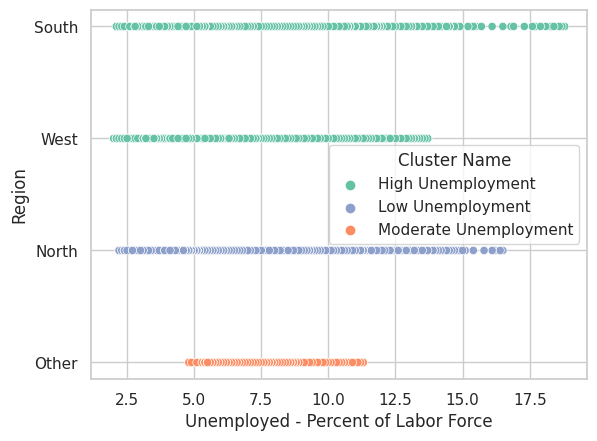

In [27]:
# Select relevant columns
columns_of_interest = ['Region', 'Unemployed - Percent of Labor Force']
selected_data = Unemployment[columns_of_interest]

# Pivot the data for clustering
pivot_data = selected_data.pivot_table(index='Region', values='Unemployed - Percent of Labor Force', aggfunc='mean')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
Unemployment['Cluster'] = Unemployment['Region'].map(dict(zip(pivot_data.index, clusters)))

# Rename cluster labels
cluster_names = {0: 'High Unemployment', 1: 'Moderate Unemployment', 2: 'Low Unemployment'}
Unemployment['Cluster Name'] = Unemployment['Cluster'].map(cluster_names)

# Set different colors for each cluster
cluster_palette = {value: sns.color_palette("Set2")[key] for key, value in cluster_names.items()}

# Visualize the clusters with different colors
sns.scatterplot(x='Unemployed - Percent of Labor Force', y='Region', hue='Cluster Name', palette=cluster_palette, data=Unemployment)
plt.show()

The graph is a cluster plot. In this case, the graph shows the results of clustering the "unemployment" dataset by the "Unemployed - Percent of Labor Force" variable.

The three clusters are labeled "High Unemployment", "Moderate Unemployment", and "Low Unemployment". The x-axis of the graph shows the "Unemployed - Percent of Labor Force" variable, and the y-axis of the graph shows the "Region" variable.

The graph shows that there are three distinct clusters of regions. The "High Unemployment" cluster consists of regions with a high percentage of unemployed people. The "Moderate Unemployment" cluster consists of regions with a moderate percentage of unemployed people. The "Low Unemployment" cluster consists of regions with a low percentage of unemployed people.

The graph also shows that there is some overlap between the clusters. For example, there are some regions in the "Moderate Unemployment" cluster that have a higher percentage of unemployed people than some regions in the "High Unemployment" cluster. This is because the clustering algorithm is based on the "Unemployed - Percent of Labor Force" variable only, and it does not take into account other factors that may affect unemployment, such as the cost of living or the availability of jobs.

Overall, the graph shows that there is a correlation between the "Unemployed - Percent of Labor Force" variable and the "Region" variable. The graph can be used to identify regions with high, moderate, and low unemployment rates.

### How effective are regularization techniques (Ridge/LASSO) in improving the predictive accuracy of our unemployment rate model?

In [28]:
features = ['Civilian Population', 'Total Labor Force', 'Percent of Population']
target_variable = 'Unemployed - Percent of Labor Force'

# Separating features (X) and target variable (y)
X = Unemployment[features]
y = Unemployment[target_variable]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Assuming your features are stored in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions_train = ridge_model.predict(X_train)  # Predictions on the training set
ridge_predictions_test = ridge_model.predict(X_test)    # Predictions on the test set
ridge_rmse_train = mean_squared_error(y_train, ridge_predictions_train, squared=False)
ridge_rmse_test = mean_squared_error(y_test, ridge_predictions_test, squared=False)

# LASSO Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_predictions_train = lasso_model.predict(X_train)  # Predictions on the training set
lasso_predictions_test = lasso_model.predict(X_test)    # Predictions on the test set
lasso_rmse_train = mean_squared_error(y_train, lasso_predictions_train, squared=False)
lasso_rmse_test = mean_squared_error(y_test, lasso_predictions_test, squared=False)

print("Ridge RMSE - Training:", ridge_rmse_train)
print("Ridge RMSE - Testing:", ridge_rmse_test)

print("\nLASSO RMSE - Training:", lasso_rmse_train)
print("LASSO RMSE - Testing:", lasso_rmse_test)

Ridge RMSE - Training: 1.906712842045174
Ridge RMSE - Testing: 1.9537924936673028

LASSO RMSE - Training: 1.9325195650376055
LASSO RMSE - Testing: 1.9727134882517767


RMSE is a measure of the average deviation between predicted values and actual values. Lower RMSE values indicate better model performance.
In this case, both Ridge and LASSO models have similar RMSE values, indicating comparable performance on the test set.

It seems that the Ridge and LASSO models are well-balanced and not exhibiting signs of significant overfitting or underfitting. 

### Regions with the most or least unemployment 

In [29]:
# Sorting states based on unemployment rate
sorted_states = Unemployment.sort_values(by='Unemployed - Percent of Labor Force')

# States with the most unemployment
most_unemployment = sorted_states.tail(5)

# States with the least unemployment
least_unemployment = sorted_states.head(5)

print("States with the most unemployment:\n", most_unemployment[['State', 'Unemployed - Percent of Labor Force']])
print("\nStates with the least unemployment:\n", least_unemployment[['State', 'Unemployed - Percent of Labor Force']])

States with the most unemployment:
               State  Unemployed - Percent of Labor Force
4536  West Virginia                                 18.4
4332  West Virginia                                 18.6
4485  West Virginia                                 18.6
4434  West Virginia                                 18.7
4383  West Virginia                                 18.8

States with the least unemployment:
           State  Unemployed - Percent of Labor Force
25919    Hawaii                                  2.0
25868    Hawaii                                  2.0
25766    Hawaii                                  2.1
25613    Hawaii                                  2.1
15244  Virginia                                  2.1


In [30]:
# Convert 'Month and Year' to a datetime format
Unemployment['Month and Year'] = pd.to_datetime(Unemployment['Month and Year'], format='%B %Y')

# Extract the year and create a new column
Unemployment['Year'] = Unemployment['Month and Year'].dt.year

# Drop the original 'Month and Year' column if needed
# unemployment_data.drop('Month and Year', axis=1, inplace=True)

# Display the updated DataFrame
print(Unemployment)

      Month and Year          State  Civilian Population  Total Labor Force  \
0         1976-01-01        Alabama              2605000            1492409   
1         1976-01-01         Alaska               232000             159154   
2         1976-01-01        Arizona              1621000             972413   
3         1976-01-01       Arkansas              1536000             882835   
4         1976-01-01     California             15621000            9781720   
...              ...            ...                  ...                ...   
26311     2018-12-01       Virginia              6687293            4359242   
26312     2018-12-01     Washington              5988337            3812295   
26313     2018-12-01  West Virginia              1449598             781846   
26314     2018-12-01      Wisconsin              4631259            3149038   
26315     2018-12-01        Wyoming               443114             286749   

       Percent of Population  Employed - Total  \
0

The transformation facilitates tasks such as identifying states with the highest and lowest unemployment rates for specific years.
The creation of a new 'Year' column enables grouping of the data based on years. This is particularly useful for tasks like identifying states with the highest or lowest unemployment rates for specific years.
The transformation ensures a standardized format for the 'Month and Year' information, making it consistent and easier to work with in subsequent analyses. This can prevent issues related to inconsistent date formats.

In [31]:
# Group by Year and State, calculate the mean of unemployment rate
grouped_data = Unemployment.groupby(['Year', 'State'])['Unemployed - Percent of Labor Force'].mean().reset_index()

# Identify states with the most and least unemployment by year
most_unemployment_by_year = grouped_data.loc[grouped_data.groupby('Year')['Unemployed - Percent of Labor Force'].idxmax()]
least_unemployment_by_year = grouped_data.loc[grouped_data.groupby('Year')['Unemployed - Percent of Labor Force'].idxmin()]

# Display the results
print("States with the most unemployment by year:")
print(most_unemployment_by_year[['Year', 'State', 'Unemployed - Percent of Labor Force']])

print("\nStates with the least unemployment by year:")
print(least_unemployment_by_year[['Year', 'State', 'Unemployed - Percent of Labor Force']])

States with the most unemployment by year:
      Year                 State  Unemployed - Percent of Labor Force
30    1976            New Jersey                            10.425000
52    1977                Alaska                             9.866667
103   1978                Alaska                            10.616667
154   1979                Alaska                             9.275000
226   1980              Michigan                            12.350000
277   1981              Michigan                            12.391667
328   1982              Michigan                            15.333333
405   1983         West Virginia                            17.791667
456   1984         West Virginia                            14.758333
507   1985         West Virginia                            13.150000
528   1986             Louisiana                            12.733333
579   1987             Louisiana                            12.116667
630   1988             Louisiana               

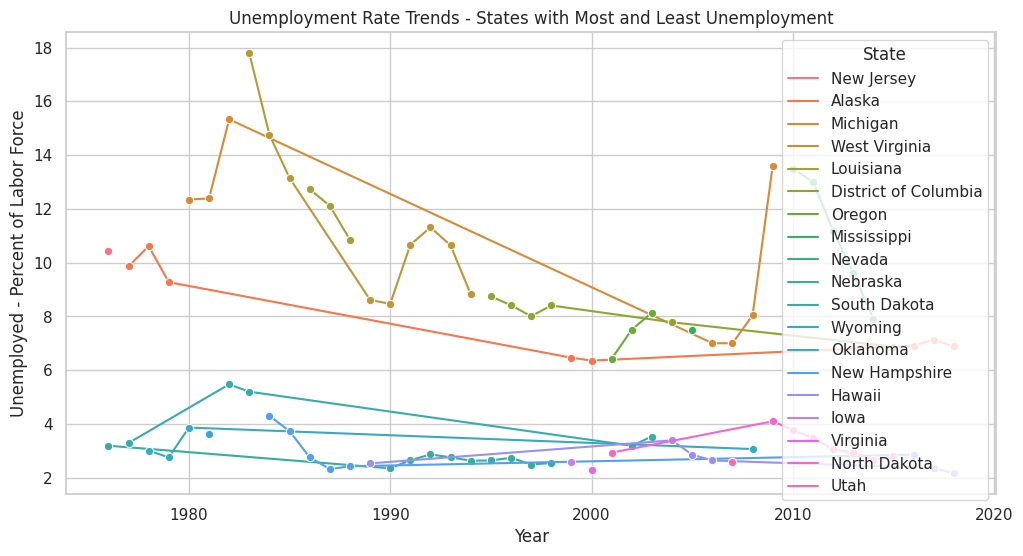

In [32]:
# Group by Year and State, calculate the mean of unemployment rate
grouped_data = Unemployment.groupby(['Year', 'State'])['Unemployed - Percent of Labor Force'].mean().reset_index()

# Identify states with the most and least unemployment by year
most_unemployment_by_year = grouped_data.loc[grouped_data.groupby('Year')['Unemployed - Percent of Labor Force'].idxmax()]
least_unemployment_by_year = grouped_data.loc[grouped_data.groupby('Year')['Unemployed - Percent of Labor Force'].idxmin()]

# Combine data for plotting
plot_data = pd.concat([most_unemployment_by_year, least_unemployment_by_year])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Unemployed - Percent of Labor Force', hue='State', data=plot_data, marker='o')
plt.title('Unemployment Rate Trends - States with Most and Least Unemployment')
plt.xlabel('Year')
plt.ylabel('Unemployed - Percent of Labor Force')
plt.legend(title='State')
plt.show()

The provided analysis identifies states in the United States with the highest and lowest unemployment rates for each year from 1976 to 2018. States with the most unemployment fluctuated over the years, with West Virginia, Alaska, Michigan, and Nevada experiencing periods of elevated unemployment rates, reaching as high as 18.8% in West Virginia in 1984 and 13.608% in Michigan in 2009. On the other hand, states with the least unemployment consistently included Nebraska, Wyoming, New Hampshire, Hawaii, and North Dakota. These states maintained relatively low unemployment rates, such as 2.325% in Nebraska in 1987 and 2.166% in Hawaii in 2018. The analysis highlights the dynamic nature of unemployment trends across states and underscores the importance of considering both the highest and lowest rates for a comprehensive understanding of economic dynamics over the years.

In [33]:
# Group by Year and Region, calculate the mean of unemployment rate
grouped_data = Unemployment.groupby(['Year', 'Region'])['Unemployed - Percent of Labor Force'].mean().reset_index()

# Identify states with the most and least unemployment by year
most_unemployment_by_year = grouped_data.loc[grouped_data.groupby('Year')['Unemployed - Percent of Labor Force'].idxmax()]
least_unemployment_by_year = grouped_data.loc[grouped_data.groupby('Year')['Unemployed - Percent of Labor Force'].idxmin()]

# Display the results
print("States with the most unemployment by year:")
print(most_unemployment_by_year[['Year', 'Region', 'Unemployed - Percent of Labor Force']])

print("\nStates with the least unemployment by year:")
print(least_unemployment_by_year[['Year', 'Region', 'Unemployed - Percent of Labor Force']])

States with the most unemployment by year:
     Year Region  Unemployed - Percent of Labor Force
1    1976  Other                             8.950000
5    1977  Other                             9.183333
9    1978  Other                             8.275000
13   1979  Other                             7.025000
17   1980  Other                             7.366667
21   1981  Other                             8.941667
25   1982  Other                            10.441667
29   1983  Other                            11.216667
33   1984  Other                             9.175000
37   1985  Other                             8.133333
42   1986  South                             7.869792
46   1987  South                             7.039062
50   1988  South                             6.345312
54   1989  South                             5.786979
57   1990  Other                             6.266667
61   1991  Other                             7.758333
65   1992  Other                       

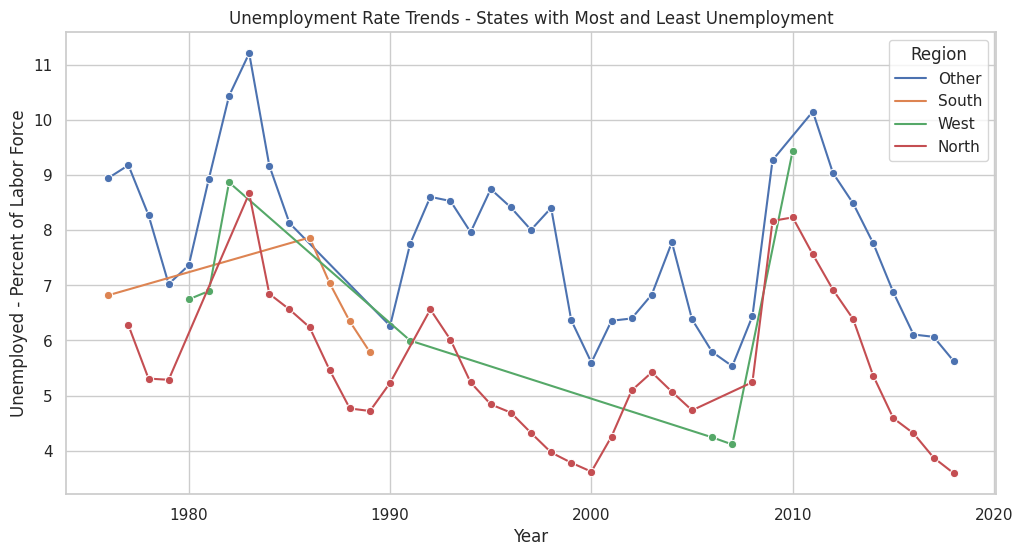

In [34]:
# Group by Year and Region, calculate the mean of unemployment rate
grouped_data = Unemployment.groupby(['Year', 'Region'])['Unemployed - Percent of Labor Force'].mean().reset_index()

# Identify states with the most and least unemployment by year
most_unemployment_by_year = grouped_data.loc[grouped_data.groupby('Year')['Unemployed - Percent of Labor Force'].idxmax()]
least_unemployment_by_year = grouped_data.loc[grouped_data.groupby('Year')['Unemployed - Percent of Labor Force'].idxmin()]

# Combine data for plotting
plot_data = pd.concat([most_unemployment_by_year, least_unemployment_by_year])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Unemployed - Percent of Labor Force', hue='Region', data=plot_data, marker='o')
plt.title('Unemployment Rate Trends - States with Most and Least Unemployment')
plt.xlabel('Year')
plt.ylabel('Unemployed - Percent of Labor Force')
plt.legend(title='Region')
plt.show()

The analysis groups unemployment data by year and region, calculating the mean unemployment rate for each combination. States with the most unemployment rates varied by year and were predominantly found in the "Other" region, experiencing fluctuations over time. Notable instances included Michigan in the 1980s and West Virginia in the 2000s. On the contrary, states with the least unemployment rates were consistently found in different regions, including North, South, and West. Nebraska, for instance, frequently maintained low unemployment rates in the North region throughout the years. This analysis underscores the regional disparities in unemployment trends, with certain regions consistently exhibiting higher or lower rates compared to others. Understanding these regional variations is crucial for policymakers and researchers seeking to address economic challenges and formulate targeted interventions to mitigate unemployment disparities.